In [17]:
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np

In [18]:
import matplotlib.pyplot as plt
from cycler import cycler
from random import sample,seed
seed(12434)

default_cycler = cycler(linestyle=['-', '-', '-', '--', '-', '-', '-'])+\
                 cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#bcbd22', '#17becf'])

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

px = 1/plt.rcParams['figure.dpi'] 

## Read CSV

In [19]:
# textWidget=widgets.Text()
# print('Enter a csv filename:')
# display(textWidget)

# df = None

# def handle_submit(sender):
#     global df
#     filename = textWidget.value
#     print("Reading {}".format(filename))

# textWidget.on_submit(handle_submit)

from glob import glob

fn = glob("*.csv")
df = pd.read_csv(fn[0])

df

,step,task,acc_pretrain_T0,acc_pretrain_T1,acc_pretrain_T2,acc_pretrain_T3,acc_pretrain_T4,online_acc_drifta50_sgd_0.01,detected_drift_drifta50_sgd_0.01,diff_X_t_drifta50_sgd_0.01,...,forget_conr25_sgd_0.01_T2,forget_conr25_sgd_0.01_T3,forget_conr25_sgd_0.01_T4,forget_avg_conr25_sgd_0.01,forget_conr50_sgd_0.01_T0,forget_conr50_sgd_0.01_T1,forget_conr50_sgd_0.01_T2,forget_conr50_sgd_0.01_T3,forget_conr50_sgd_0.01_T4,forget_avg_conr50_sgd_0.01
0,0,0,0.398,0.21,0.0,0.0,0.0,0.40625,False,0.59375,...,0.000,0.000,0.000,0.0420,0.000,0.210,0.000,0.000,0.000,0.0420
1,1,0,0.398,0.21,0.0,0.0,0.0,0.25000,False,0.15625,...,0.000,0.000,0.000,0.0130,0.442,0.000,0.000,0.000,0.000,0.0884
2,2,0,0.398,0.21,0.0,0.0,0.0,0.31250,False,-0.06250,...,0.010,0.000,0.000,0.0360,0.063,0.150,0.000,0.000,0.196,0.0818
3,3,0,0.398,0.21,0.0,0.0,0.0,0.43750,False,-0.12500,...,0.010,0.000,0.000,0.0200,0.202,0.214,0.000,0.000,0.143,0.1118
4,4,0,0.398,0.21,0.0,0.0,0.0,0.31250,False,0.12500,...,0.007,0.000,0.024,0.0224,0.000,0.210,0.110,0.000,0.076,0.0792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,4,0.398,0.21,0.0,0.0,0.0,0.84375,False,0.06250,...,0.293,0.343,0.111,0.3320,0.422,0.336,0.428,0.280,0.078,0.3088
1556,1556,4,0.398,0.21,0.0,0.0,0.0,0.90625,False,-0.06250,...,0.571,0.268,0.098,0.3372,0.514,0.374,0.365,0.292,0.022,0.3134
1557,1557,4,0.398,0.21,0.0,0.0,0.0,0.93750,False,-0.03125,...,0.520,0.264,0.052,0.3300,0.468,0.386,0.377,0.268,0.024,0.3046
1558,1558,4,0.398,0.21,0.0,0.0,0.0,0.87500,False,0.06250,...,0.467,0.310,0.060,0.3248,0.475,0.378,0.400,0.298,0.024,0.3150


In [20]:

all_methods = ["catf", "conr1", "conr10", "conr25", "conr50", "drifta50", "2drifta50", "cont_conv", "drifta_conv", "2drifta_conv"]
lmethod     = ["\catf{}", "\conr[1]{}", "\conr[10]{}", "\conr[25]{}", "\conr[50]{}", "\driftadyn[50]{}", "\ddriftadyn[50]{}", "\conrconv", "\driftaconv", "\ddriftaconv"]

latex_method_name = {}

for k, method in enumerate(all_methods):
    latex_method_name[method]=lmethod[k]


methods = ["catf", "conr1", "conr10", "conr25", "conr50", "drifta" "2drifta", "cont_conv", "drifta_conv", "2drifta_conv"]
#methods = ["catf", "conr1", "conr10", "drifta", "2drifta"]
print(df.columns)

Index(['step', 'task', 'acc_pretrain_T0', 'acc_pretrain_T1', 'acc_pretrain_T2',
       'acc_pretrain_T3', 'acc_pretrain_T4', 'online_acc_drifta50_sgd_0.01',
       'detected_drift_drifta50_sgd_0.01', 'diff_X_t_drifta50_sgd_0.01',
       ...
       'forget_conr25_sgd_0.01_T2', 'forget_conr25_sgd_0.01_T3',
       'forget_conr25_sgd_0.01_T4', 'forget_avg_conr25_sgd_0.01',
       'forget_conr50_sgd_0.01_T0', 'forget_conr50_sgd_0.01_T1',
       'forget_conr50_sgd_0.01_T2', 'forget_conr50_sgd_0.01_T3',
       'forget_conr50_sgd_0.01_T4', 'forget_avg_conr50_sgd_0.01'],
      dtype='object', length=184)


## Compute number of training batches

ER-1               624
ER-10             6240
ER-25            15600
ER-50            31200
DRIFTA-DYN-50    16460
DRIFTA-CONV       5682
2DRIFTA-CONV      6164
dtype: int64
ER-1               624
ER-10             6240
ER-25            15600
ER-50            31200
DRIFTA-DYN-50    29510
DRIFTA-CONV       8348
2DRIFTA-CONV      8660
dtype: int64
ER-1               624
ER-10             6240
ER-25            15600
ER-50            31200
DRIFTA-DYN-50    23938
DRIFTA-CONV       7550
2DRIFTA-CONV      8176
dtype: int64
ER-1               624
ER-10             6240
ER-25            15600
ER-50            31200
DRIFTA-DYN-50    11040
DRIFTA-CONV       2394
2DRIFTA-CONV      1872
dtype: int64
ER-1               624
ER-10             6240
ER-25            15600
ER-50            31200
DRIFTA-DYN-50    10822
DRIFTA-CONV        966
2DRIFTA-CONV      1714
dtype: int64
                   0      1      2      3      4
ER-1             624    624    624    624    624
ER-10           6240   6240   62

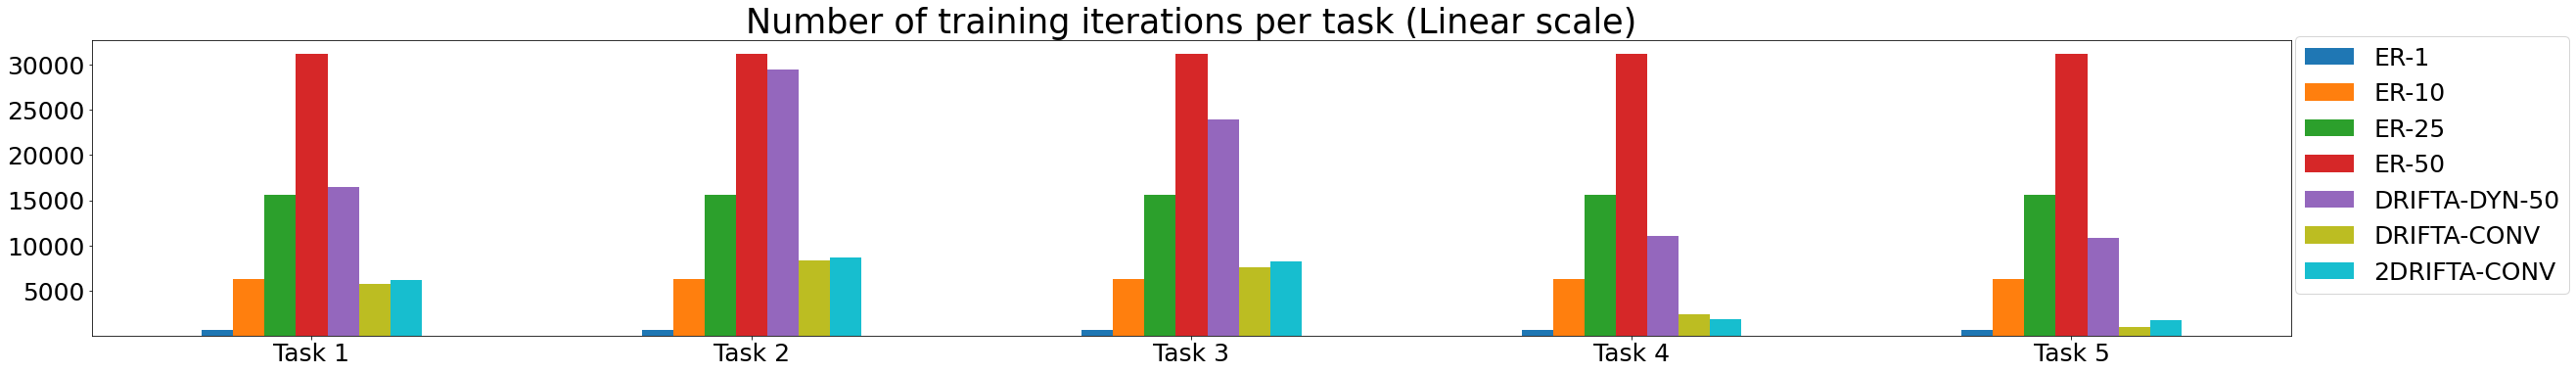

In [54]:
###########################################################
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
      for method in ["conr1", "conr10", "conr25", "conr50", "drifta50", "drifta_conv", "2drifta_conv"]:
            columns += ['train_batches_{}_{}_{}'.format(method, opt, lr)]
        

name_map = {col:col.replace("train_batches_","").replace("_sgd_0.01","").upper()\
             .replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")\
             .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}

train_batches0 = df[columns].iloc[0:312].sum().rename(name_map, axis='index')
train_batches1 = df[columns].iloc[312:624].sum().rename(name_map, axis='index')
train_batches2 = df[columns].iloc[624:936].sum().rename(name_map, axis='index')
train_batches3 = df[columns].iloc[936:1248].sum().rename(name_map, axis='index')
train_batches4 = df[columns].iloc[1248:1560].sum().rename(name_map, axis='index')

print(train_batches0)
print(train_batches1)
print(train_batches2)
print(train_batches3)
print(train_batches4)

frames = [train_batches0, train_batches1, train_batches2, train_batches3, train_batches4 ]

train_batches = pd.concat(frames,  join="inner", axis=1)

# for i in [name_map0,name_map1,name_map2,name_map3,name_map4]:
#     print(i); print("#############")

print(train_batches)

train_batches.T.plot.bar(figsize=(2900*px,400*px), alpha=1,)
#plt.grid(axis='y')

plt.title('Number of training iterations per task (Linear scale)',fontsize=35, loc='center')
plt.xticks([0,1,2,3,4],['Task 1','Task 2','Task 3','Task 4','Task 5'], rotation='horizontal', fontsize=25)
plt.yticks([5000, 10000, 15000, 20000, 25000, 30000], fontsize=25)
plt.legend(ncol=1, fontsize=25,  loc='lower right', bbox_to_anchor=(0.832, 0.1, 0.3, 0.2),)
    
plt.savefig("scratch-cifar10-exp3-buf50-batches-per-task.png")



## Plot average accuracy (on all tasks) per method

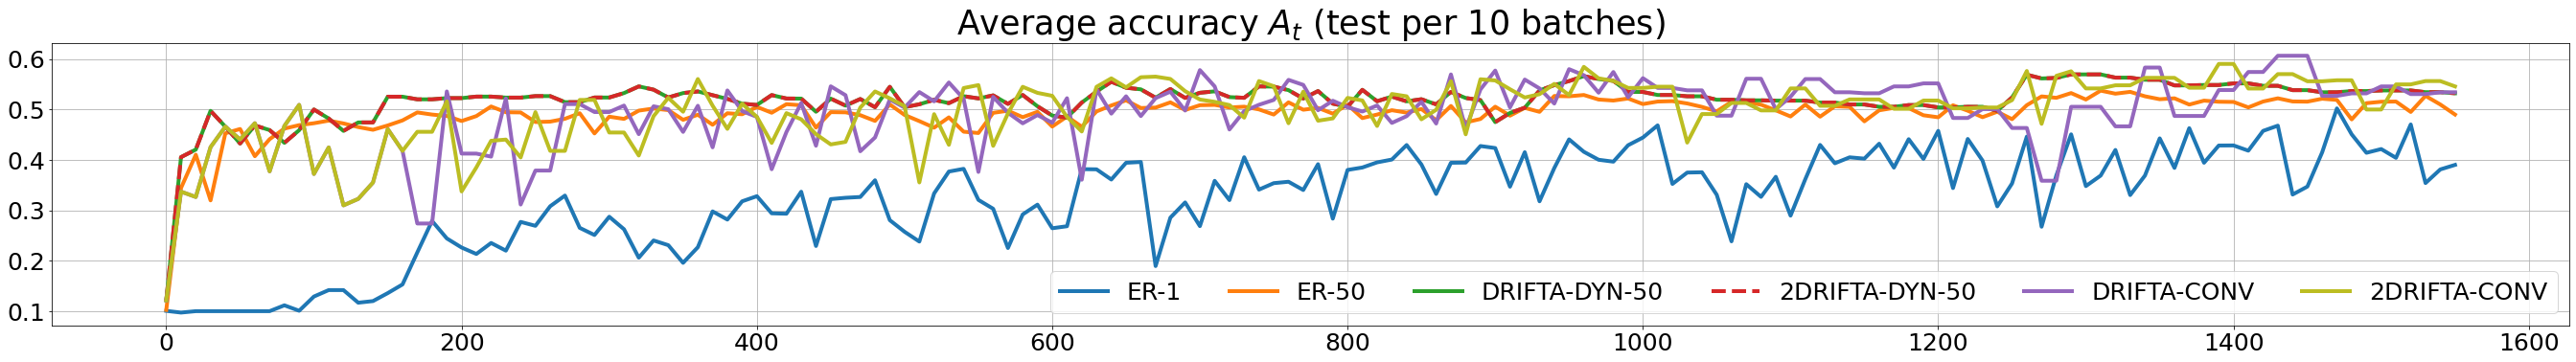

In [59]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in ["conr1", "conr50",  "drifta50", "2drifta50",  "drifta_conv", "2drifta_conv", ]:
            columns += ["acc_avg_{}_{}_{}".format(method, opt, lr)]


center=0
window=3000
name_map = {col:col.replace("acc_avg_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}
#print(name_map)
px = 1/plt.rcParams['figure.dpi'] 
#df[columns].plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)

acc_avg = df[columns].iloc[0:1560:10]

acc_avg.plot(figsize=(2700*px,400*px), linewidth=4, alpha=1)

name_map["acc_avg_pretrain"]="Baseline"
name_map["acc_avg_catf_sgd_0.01"] = "No rehearsal"

plt.title('Average accuracy $A_t$ (test per 10 batches)',fontsize=35, loc='center')
plt.grid()
plt.tight_layout(pad=2.5)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(name_map.values(),ncol=6, loc='lower right', fontsize=25,)
# for x in range(5):
#     plt.axvline(x=312*x, color='black', linestyle=":")
plt.savefig("scratch-cifar10-exp3-buf50-avg-acc.png")



## Average Accuracy per task

CATF_T0             0.107594
ER-1_T0             0.441781
ER-10_T0            0.585399
ER-25_T0            0.598620
ER-50_T0            0.626728
DRIFTA-DYN-50_T0    0.646759
DRIFTA-CONV_T0      0.609392
2DRIFTA-CONV_T0     0.618108
ER-1_T1             0.238231
ER-10_T1            0.315526
ER-25_T1            0.314912
ER-50_T1            0.324047
DRIFTA-DYN-50_T1    0.348912
DRIFTA-CONV_T1      0.343477
2DRIFTA-CONV_T1     0.329663
ER-1_T2             0.249201
ER-10_T2            0.354280
ER-25_T2            0.371859
ER-50_T2            0.387980
DRIFTA-DYN-50_T2    0.422406
DRIFTA-CONV_T2      0.383458
2DRIFTA-CONV_T2     0.422546
ER-1_T3             0.339804
ER-10_T3            0.495996
ER-25_T3            0.525396
ER-50_T3            0.554046
DRIFTA-DYN-50_T3    0.582244
DRIFTA-CONV_T3      0.534157
2DRIFTA-CONV_T3     0.552158
ER-1_T4             0.369032
ER-10_T4            0.519749
ER-25_T4            0.552415
ER-50_T4            0.572204
DRIFTA-DYN-50_T4    0.605143
DRIFTA-CONV_T4

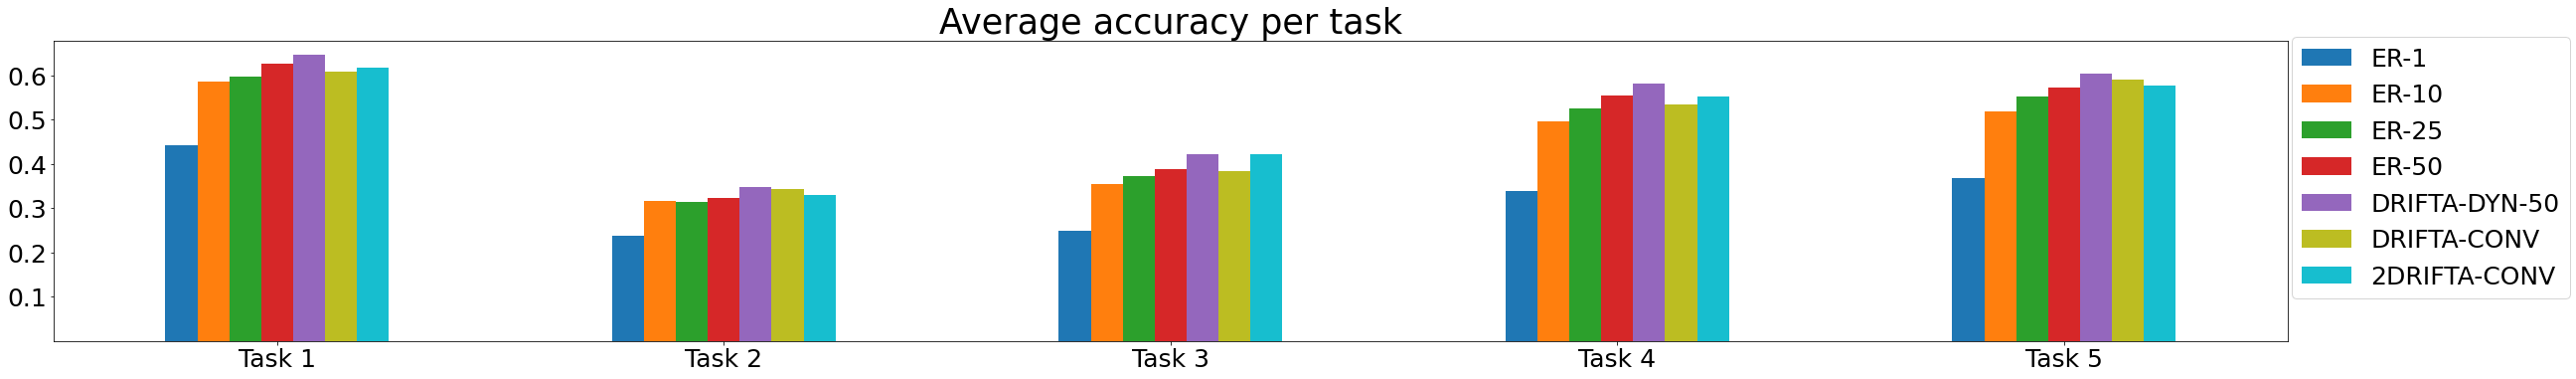

In [53]:
###########################################################
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
      for method in ["catf", "conr1",  "conr10", "conr25", "conr50", "drifta50", "drifta_conv", "2drifta_conv"]:
            columns += ['acc_{}_{}_{}_T0'.format(method, opt, lr)]
        

name_map0 = {col:col.replace("acc_","").replace("_sgd_0.01","").upper()\
             .replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")\
             .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}

running_acc_0 = df[columns].mean().rename(name_map0, axis='index')



###########################################################
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
      for method in [ "conr1",  "conr10", "conr25", "conr50", "drifta50", "drifta_conv", "2drifta_conv"]:
            columns += ['acc_{}_{}_{}_T1'.format(method, opt, lr)]
        

name_map1 = {col:col.replace("acc_","").replace("_sgd_0.01","").upper()\
             .replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")\
             .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}

running_acc_1 = df[columns].mean().rename(name_map1, axis='index')


###########################################################
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
      for method in [ "conr1",  "conr10", "conr25", "conr50", "drifta50", "drifta_conv", "2drifta_conv"]:
            columns += ['acc_{}_{}_{}_T2'.format(method, opt, lr)]
        

name_map2 = {col:col.replace("acc_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}

running_acc_2 = df[columns].mean().rename(name_map2, axis='index')


###########################################################
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
      for method in [ "conr1",  "conr10", "conr25", "conr50", "drifta50", "drifta_conv", "2drifta_conv"]:
            columns += ['acc_{}_{}_{}_T3'.format(method, opt, lr)]
        

name_map3 = {col:col.replace("acc_","").replace("_sgd_0.01","").upper()\
             .replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")\
             .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}

running_acc_3 = df[columns].mean().rename(name_map3, axis='index')


###########################################################
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
      for method in [ "conr1",  "conr10", "conr25", "conr50", "drifta50", "drifta_conv", "2drifta_conv"]:
            columns += ['acc_{}_{}_{}_T4'.format(method, opt, lr)]
        

name_map4 = {col:col.replace("acc_","").replace("_sgd_0.01","").upper()\
                   .replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")\
                   .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}


running_acc_4 = df[columns].mean().rename(name_map4, axis='index')

frames = [running_acc_0, running_acc_1, running_acc_2, running_acc_3, running_acc_4 ]

result = pd.concat(frames)

print(result)
for i in [name_map0,name_map1,name_map2,name_map3,name_map4]:
    print(i); print("#############")

    
    
    
new_map0={k:k[:len(k)-3] for k in name_map0.values()}
# print(new_map0)
running_acc_0=running_acc_0.rename(index=new_map0)
# print(running_acc_0)
###################################################


new_map1={k:k[:len(k)-3] for k in name_map1.values()}
# print(new_map1)
running_acc_1=running_acc_1.rename(index=new_map1)
# print(running_acc_1)
###################################################


new_map2={k:k[:len(k)-3] for k in name_map2.values()}
# print(new_map2)
running_acc_2=running_acc_2.rename(index=new_map2)
# print(running_acc_2)
###################################################


new_map3={k:k[:len(k)-3] for k in name_map3.values()}
# print(new_map3)
running_acc_3=running_acc_3.rename(index=new_map3)
# print(running_acc_3)
###################################################


new_map4={k:k[:len(k)-3] for k in name_map4.values()}
print(new_map4)
running_acc_4=running_acc_4.rename(index=new_map4)
# print(running_acc_4)   

frames = [running_acc_0, running_acc_1, running_acc_2, running_acc_3, running_acc_4 ]

result = pd.concat(frames,  join="inner", axis=1)

print(result)
print(result.T)


# for i in [name_map0,name_map1,name_map2,name_map3,name_map4]:
#     print(i); print("#############")



result.T.plot.bar(figsize=(2900*px,400*px), alpha=1)
plt.title('Average accuracy per task',fontsize=35, loc='center')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6],fontsize=25)
plt.xticks([0,1,2,3,4],['Task 1','Task 2','Task 3','Task 4','Task 5'],rotation='horizontal', fontsize=25)
plt.legend(ncol=1, fontsize=25,  loc='lower right', bbox_to_anchor=(0.832, 0.1, 0.3, 0.2),)

# df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

# ax = df.plot.bar(x='lab', y='val', rot=0)

plt.savefig("scratch-cifar10-exp3-buf50-acc-per-task.png")



## Create tables

In [24]:
metrics = {}
_stats  = [\
          "train_batches", "acc_avg", "acc_run", "online_acc"]

lstats = [\
          "$N_{t}$", "$\\bar{A}$",  \
          "$\\bar{C}_{t}$",  \
          "$\\bar{O}_{t}$"]

LATEX_STATS = {s:ls for s,ls in zip(_stats,lstats)}

stats  = [\
          "train_batches", \
          "acc_avg", \
          "acc_run", \
          "online_acc"]

methods     =  ["catf", "conr1", "conr10", "conr25", "conr50", "drifta50", "2drifta50", "drifta_conv",  "2drifta_conv"]
lr      = [0.01]
opt     = ["sgd"]

################################################################################
columns = []
for llr in lr:
    for lopt in opt: 
        for method in methods:
            columns += ["train_batches_{}_{}_{}".format(method, lopt, llr)]

train_batches=df[columns].cumsum()
metrics['train_batches'] = df[columns].sum()
################################################################################







################################################################################
columns = []
for llr in lr:
    for lopt in opt: 
        for method in methods:
            columns += ["acc_avg_{}_{}_{}".format(method, lopt, llr)]



metrics['acc_avg'] = df[columns].mean()
################################################################################




################################################################################
columns = []
for llr in lr:
    for lopt in opt:
        for method in methods:
            mapper = lambda row: row['acc_{}_{}_{}_T{}'.format(method, lopt, llr, int(row['task']))]
            column_name = 'acc_run_{}_{}_{}'.format(method, lopt, llr)
            columns += [column_name]
            df[column_name] = df.apply(mapper, axis=1)

running_acc = df[columns]
metrics['acc_run'] = df[columns].mean()
################################################################################




################################################################################
columns = []
for llr in lr:
    for lopt in opt:
        for method in methods:
            columns += ["online_acc_{}_{}_{}".format(method, lopt, llr)]

online_acc = df[columns]
metrics['online_acc'] = df[columns].mean()
################################################################################


print('\\begin{table}[hbt!]')
print('\\centering')
print('\\begin{tabular}')
print('{|l|c||c|||c||c|}')
print('\\hline')

ROWS = metrics['train_batches'].keys()

print(ROWS)

first_row = 'Method'
for stat in stats:
    first_row += ' & '+LATEX_STATS[stat]
print(first_row+"\\"+'\\')
for i, name in enumerate(ROWS):
    name = name.replace('train_batches_','').replace('_sgd_0.01', '')
    # print('{} & '.format(name), end=' ')
    print('{}'.format(latex_method_name[name]), end='')
    for stat in stats:
        res = metrics[stat].values[i]
        print(' & {}'.format(np.round(res, decimals=3)), end='')
    print("\\\\")
    print("\n\\hline")

print('\end{tabular}')
print('\end{table}')

\begin{table}[hbt!]
\centering
\begin{tabular}
{|l|c||c|||c||c|}
\hline
Index(['train_batches_catf_sgd_0.01', 'train_batches_conr1_sgd_0.01',
       'train_batches_conr10_sgd_0.01', 'train_batches_conr25_sgd_0.01',
       'train_batches_conr50_sgd_0.01', 'train_batches_drifta50_sgd_0.01',
       'train_batches_2drifta50_sgd_0.01',
       'train_batches_drifta_conv_sgd_0.01',
       'train_batches_2drifta_conv_sgd_0.01'],
      dtype='object')
Method & $N_{t}$ & $\bar{A}$ & $\bar{C}_{t}$ & $\bar{O}_{t}$\\
\catf{} & 1560 & 0.131 & 0.634 & 0.632\\

\hline
\conr[1]{} & 3120 & 0.328 & 0.657 & 0.659\\

\hline
\conr[10]{} & 31200 & 0.454 & 0.651 & 0.671\\

\hline
\conr[25]{} & 78000 & 0.473 & 0.677 & 0.703\\

\hline
\conr[50]{} & 156000 & 0.493 & 0.7 & 0.732\\

\hline
\driftadyn[50]{} & 91770 & 0.521 & 0.747 & 0.77\\

\hline
\ddriftadyn[50]{} & 91770 & 0.521 & 0.747 & 0.77\\

\hline
\driftaconv & 24940 & 0.492 & 0.708 & 0.725\\

\hline
\ddriftaconv & 26586 & 0.5 & 0.706 & 0.726\\

\hline
\end